# Analysis of Participant Survey

## Download latest data from server

In [146]:
!wget -N http://138.246.234.218/static/records.json -P /tmp

--2020-09-03 17:53:57--  http://138.246.234.218/static/records.json
Connecting to 138.246.234.218:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162534 (159K) [application/json]
Saving to: ‘/tmp/records.json’

records.json        100%[===================>] 158,72K  --.-KB/s    in 0,1s    

2020-09-03 17:53:57 (1,06 MB/s) - ‘/tmp/records.json’ saved [162534/162534]



## Imports

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

## Clean up data

discard samples 
* with durations shorter than 1.5s
* with duration longer than 20s
* of the first 5 classifications

discard users
* with less than 20 classifications

In [148]:
minimum_duration = 1.5 # s
maximum_duration = 30 # s
warm_up_trials = 5 # discards first N classifications to get used to the system
minimum_number_of_samples_per_user = 20

data = pd.read_json("/tmp/records.json", lines=True).dropna()

data = data.loc[data["counter"]>warm_up_trials]
data = data.loc[data["duration"]>minimum_duration]
data = data.loc[data["duration"]<maximum_duration]


# list of uuids that have been sent out to participants
valid_userids = [
    "12ea7ec6-bf22-432f-b1a9-30d7395396d8",
    "fa98ff24-2bf4-4967-b291-5626fec8e4b7",
    "671c4e62-de3e-4dbb-9646-9ed6b0a8fd54",
    "1a8005da-b2a3-4825-b74f-3207340e0a5a",
    "63a86981-501f-4882-afa3-9b4f4b774514",
    "fb8976d0-ac30-4e55-8e27-608adafdfe94",
    "3e2d6899-4651-4c56-a7b8-676bfe687a8b",
    "249d4476-8b5e-420b-b74d-3ea5a41a0b25",
    "2fb5478c-f113-434e-af84-2dae4c699478",
    "60cc0419-3519-4575-9b1a-7d2158dc406e",
    "f2440f7f-52a2-4045-930a-bc01db4913b1",
    "e52c04a0-12c0-4019-91f3-cf08a51698d9",
    "a1c7a12a-d97e-4b88-a6c4-33d663ec644f",
    "78c48be2-8e12-435e-9e13-3946ee870c11",
    "b044ed23-a222-421c-a10b-aead3d7c5f21",
    "646f8e8f-ca02-4ed9-8275-4e2da6dd6a3e",
    "cf321f5a-692a-4998-9447-5c7e3802ca3c",
    "5ec423cf-a19e-4c33-bc39-4d4743c2fbda",
    "f37eb59e-a52b-4a7a-bf25-dd8f324d7609",
    "e4919242-f24a-4b35-8ace-59ec41d88b98",
    "07413432-1e3d-427b-b245-412574262bcc",
    "e0e10f09-0fba-4dbc-a26d-547a3d6605b6",
    "78714b94-f853-4ecb-8ff7-40ae03fe91ca",
    "12f40961-b787-45c7-999a-ca2c6b45f523",
]

data = data.loc[data.userid.isin(valid_userids)]

In [149]:
def calculate_accuracy(data):
    correct_bool = data["true_class"] == data["selected_class"]
    return correct_bool.mean()
        
accuracies = pd.DataFrame(data.groupby("userid").apply(calculate_accuracy))
accuracies["counts"] = data.groupby("userid")["true_class"].count()
accuracies["duration"] = data.groupby("userid")["duration"].mean()
accuracies["duration_std"] = data.groupby("userid")["duration"].std()


accuracies = accuracies.loc[accuracies["counts"] > minimum_number_of_samples_per_user]

## Overall Classification performance

In [150]:
from sklearn.metrics import classification_report
print(classification_report(data["true_class"], data["selected_class"]))

              precision    recall  f1-score   support

           0       0.52      0.57      0.55       114
           1       0.63      0.57      0.59       145
           2       0.61      0.63      0.62       117
           3       0.56      0.56      0.56       128

    accuracy                           0.58       504
   macro avg       0.58      0.58      0.58       504
weighted avg       0.58      0.58      0.58       504



## Accuracies of different users

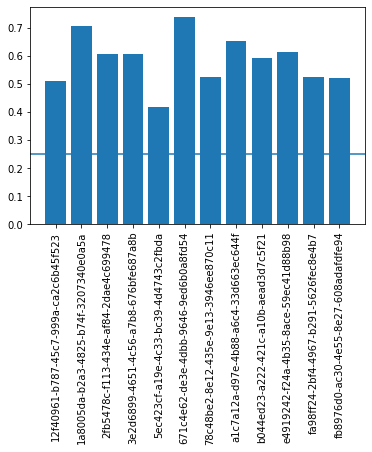

In [151]:
import matplotlib.pyplot as plt
plt.bar(x=accuracies.index,height=accuracies[0])
plt.xticks(rotation='vertical')
plt.axhline(0.25)

## Accuracy and Standard Deviation of Users

In [152]:
accuracies[0].mean(), accuracies[0].std() 

(0.5836893768369252, 0.09022751968328127)